In [3]:
import os
import sys
sys.path.append('..')  # allow this notebook to find equal-level directories
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/Users/Danny/anaconda3/envs/bayota36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [53]:
pathstem = '/Users/Danny/temp_bayota_out_2018102312/from_aws/MDcounties_costmin'
filenames = ['output_study_costmin_countytausequence19_tau20_2018-10-23_222654.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_223152.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_223322.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_223625.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_223834.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_224039.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_224524.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_225003.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_225544.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_225847.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_230025.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_230351.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_230539.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_230941.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_231220.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_231640.csv',
'output_study_costmin_countytausequence19_tau20_2018-10-23_232113.csv']
countynames = ['Allegany, MD',
                      'Anne Arundel, MD',
                      'Baltimore City, MD',
                      'Calvert, MD',
                      'Caroline, MD',
                      'Carroll, MD',
                      'Cecil, MD',
                      'Charles, MD',
                      'Dorchester, MD',
                      'Frederick, MD',
                      'Garrett, MD',
                      'Harford, MD',
                      'Howard, MD',
                      'Kent, MD',
                      'Montgomery, MD',
                      'Prince Georges, MD',
                      'Queen Annes, MD']
df_list = []
for f, c in zip(filenames, countynames):
    df_temp = pd.read_csv(os.path.join(pathstem, f))
    df_temp['id'] = c
    df_list.append(df_temp)

In [54]:
df = pd.concat(df_list)
display(df.head())

,Unnamed: 0,acres,bmpshortname,landriversegment,loadsource,totalannualizedcostperunit,totalinstancecost,originalload,N_pounds_reduced,solution_objectives,tau,feasible,x,id
0,0,0.000053,UrbanNMPlanLR,N24001PU0_3871_3690,mch,0.0,0.0,258793.134987,4326.258561,0.000016,1,True,"('UrbanNMPlanLR', 'N24001PU0_3871_3690', 'mch'...","Allegany, MD"
1,1,0.000053,UrbanNMMDDIY,N24001PU0_3871_3690,mch,0.0,0.0,258793.134987,4326.258561,0.000016,1,True,"('UrbanNMMDDIY', 'N24001PU0_3871_3690', 'mch',...","Allegany, MD"
2,2,0.000053,UrbanNMPlanHR,N24001PU0_3871_3690,mch,0.0,0.0,258793.134987,4326.258561,0.000016,1,True,"('UrbanNMPlanHR', 'N24001PU0_3871_3690', 'mch'...","Allegany, MD"
3,3,0.000053,UrbanNMPlan,N24001PU0_3871_3690,mch,0.0,0.0,258793.134987,4326.258561,0.000016,1,True,"('UrbanNMPlan', 'N24001PU0_3871_3690', 'mch', ...","Allegany, MD"
4,4,0.000593,UrbanNMPlan,N24001PU6_3870_3690,ntg,0.0,0.0,258793.134987,4326.258561,0.000016,1,True,"('UrbanNMPlan', 'N24001PU6_3870_3690', 'ntg', ...","Allegany, MD"


In [55]:
feasibledf = df[df['feasible'] == True]

grouped = feasibledf.groupby(['id', 'tau'])

In [56]:
new = grouped['solution_objectives'].mean()
tau20df = pd.DataFrame(new[new.index.get_level_values('tau')==20])
tau20df = tau20df.reset_index()
tau20df.head(5)

,id,tau,solution_objectives
0,"Allegany, MD",20,3.899965e+06
1,"Baltimore City, MD",20,1.829115e+05
2,"Calvert, MD",20,3.864293e+05
3,"Caroline, MD",20,9.981707e+05
4,"Carroll, MD",20,6.948335e+05


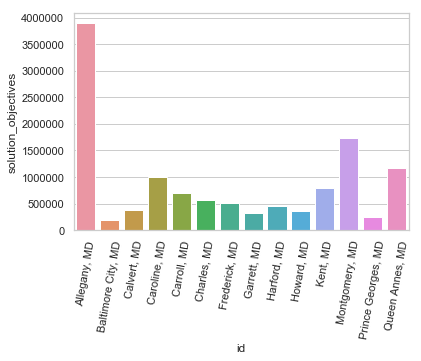

In [61]:
sns.set(style="whitegrid")
ax = sns.barplot(x="id", y="solution_objectives", data=tau20df)
for item in ax.get_xticklabels():
    item.set_rotation(80)
plt.savefig('bar_tau.png', dpi=500, bbox_inches='tight')